<a href="https://colab.research.google.com/github/Mangalam0512/Movie-Recomendation/blob/main/Notebook/MovieRecommendation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOVIE Recommentation System

# Importing Data and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data_movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
data_credits=pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
movies_data = pd.read_csv('/content/drive/MyDrive/movies.csv')


In [4]:
type(data_movies)

pandas.core.frame.DataFrame

In [5]:
data_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
data_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
movies_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

# Data Cleaning and Preprocessing

In [11]:
#data_credits = data_credits.rename(columns={'movie_id', "tittle" : 'title'})

In [8]:
data_movies = data_movies.merge(data_credits,on='title')

In [9]:
data_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [10]:
data_movies = data_movies[['genres','id','tagline','keywords' ,"title",'budget', 'overview', "cast",'revenue','release_date','runtime','vote_average',"popularity",'production_companies']]

In [11]:
data_movies.head(3)

,genres,id,tagline,keywords,title,budget,overview,cast,revenue,release_date,runtime,vote_average,popularity,production_companies
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Enter the World of Pandora.,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,237000000,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2787965087,2009-12-10,162.0,7.2,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"At the end of the world, the adventure begins.","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,300000000,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",961000000,2007-05-19,169.0,6.9,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,A Plan No One Escapes,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,245000000,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",880674609,2015-10-26,148.0,6.3,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


In [12]:
features = ['cast', 'genres','production_companies','keywords']
for feature in features:
  data_movies[feature] = data_movies[feature].apply(literal_eval)


In [13]:
data_movies.head(3)

,genres,id,tagline,keywords,title,budget,overview,cast,revenue,release_date,runtime,vote_average,popularity,production_companies
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,Enter the World of Pandora.,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",Avatar,237000000,"In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...",2787965087,2009-12-10,162.0,7.2,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"At the end of the world, the adventure begins.","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",Pirates of the Caribbean: At World's End,300000000,"Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...",961000000,2007-05-19,169.0,6.9,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,A Plan No One Escapes,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",Spectre,245000000,A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",880674609,2015-10-26,148.0,6.3,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."


In [14]:
def get_list(meta_data):
    if isinstance(meta_data, list):
        names = [col['name'] for col in meta_data]
        str=""
        for i in names:
          str=str+ " "+i
        return str
    return " "

features = ['cast','genres','production_companies','keywords']
for feature in features:
    data_movies[feature] = data_movies[feature].apply(get_list)

In [15]:
data_movies.head(3)

,genres,id,tagline,keywords,title,budget,overview,cast,revenue,release_date,runtime,vote_average,popularity,production_companies
0,Action Adventure Fantasy Science Fiction,19995,Enter the World of Pandora.,culture clash future space war space colony s...,Avatar,237000000,"In the 22nd century, a paraplegic Marine is di...",Sam Worthington Zoe Saldana Sigourney Weaver ...,2787965087,2009-12-10,162.0,7.2,150.437577,Ingenious Film Partners Twentieth Century Fox...
1,Adventure Fantasy Action,285,"At the end of the world, the adventure begins.",ocean drug abuse exotic island east india tra...,Pirates of the Caribbean: At World's End,300000000,"Captain Barbossa, long believed to be dead, ha...",Johnny Depp Orlando Bloom Keira Knightley Ste...,961000000,2007-05-19,169.0,6.9,139.082615,Walt Disney Pictures Jerry Bruckheimer Films ...
2,Action Adventure Crime,206647,A Plan No One Escapes,spy based on novel secret agent sequel mi6 br...,Spectre,245000000,A cryptic message from Bond’s past sends him o...,Daniel Craig Christoph Waltz Léa Seydoux Ralp...,880674609,2015-10-26,148.0,6.3,107.376788,Columbia Pictures Danjaq B24


In [16]:
data_movies.isnull().sum()

genres                    0
id                        0
tagline                 844
keywords                  0
title                     0
budget                    0
overview                  3
cast                      0
revenue                   0
release_date              1
runtime                   2
vote_average              0
popularity                0
production_companies      0
dtype: int64

In [16]:
selected_features = ['genres','keywords','tagline','cast']
print(selected_features)
for feature in selected_features:
  data_movies[feature] =data_movies[feature].fillna('')

['genres', 'keywords', 'tagline', 'cast']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
data_movies = data_movies.dropna()

In [19]:
data_movies.isnull().sum()

genres                  0
id                      0
tagline                 0
keywords                0
title                   0
budget                  0
overview                0
cast                    0
revenue                 0
release_date            0
runtime                 0
vote_average            0
popularity              0
production_companies    0
dtype: int64

In [20]:
data_movies.shape

(4805, 14)

In [21]:
data_movies['profit']=data_movies['revenue']-data_movies['budget']

In [22]:
data_movies['profit_percent']=data_movies['profit']*100/data_movies['budget']

In [23]:
data_movies.head()

,genres,id,tagline,keywords,title,budget,overview,cast,revenue,release_date,runtime,vote_average,popularity,production_companies,profit,profit_percent
0,Action Adventure Fantasy Science Fiction,19995,Enter the World of Pandora.,culture clash future space war space colony s...,Avatar,237000000,"In the 22nd century, a paraplegic Marine is di...",Sam Worthington Zoe Saldana Sigourney Weaver ...,2787965087,2009-12-10,162.0,7.2,150.437577,Ingenious Film Partners Twentieth Century Fox...,2550965087,1076.356577
1,Adventure Fantasy Action,285,"At the end of the world, the adventure begins.",ocean drug abuse exotic island east india tra...,Pirates of the Caribbean: At World's End,300000000,"Captain Barbossa, long believed to be dead, ha...",Johnny Depp Orlando Bloom Keira Knightley Ste...,961000000,2007-05-19,169.0,6.9,139.082615,Walt Disney Pictures Jerry Bruckheimer Films ...,661000000,220.333333
2,Action Adventure Crime,206647,A Plan No One Escapes,spy based on novel secret agent sequel mi6 br...,Spectre,245000000,A cryptic message from Bond’s past sends him o...,Daniel Craig Christoph Waltz Léa Seydoux Ralp...,880674609,2015-10-26,148.0,6.3,107.376788,Columbia Pictures Danjaq B24,635674609,259.459024
3,Action Crime Drama Thriller,49026,The Legend Ends,dc comics crime fighter terrorist secret iden...,The Dark Knight Rises,250000000,Following the death of District Attorney Harve...,Christian Bale Michael Caine Gary Oldman Anne...,1084939099,2012-07-16,165.0,7.6,112.312950,Legendary Pictures Warner Bros. DC Entertainm...,834939099,333.975640
4,Action Adventure Science Fiction,49529,"Lost in our world, found in another.",based on novel mars medallion space travel pr...,John Carter,260000000,"John Carter is a war-weary, former military ca...",Taylor Kitsch Lynn Collins Samantha Morton Wi...,284139100,2012-03-07,132.0,6.1,43.926995,Walt Disney Pictures,24139100,9.284269


In [27]:
movie_genre=pd.DataFrame(data_movies['genres'])
movie_genre=movie_genre.to_numpy()
cast=pd.DataFrame(data_movies['cast'])
cast=cast.to_numpy()
production_companies=pd.DataFrame(data_movies['production_companies'])
production_companies= production_companies.to_numpy()

In [28]:
production_companies

array([[' Ingenious Film Partners Twentieth Century Fox Film Corporation Dune Entertainment Lightstorm Entertainment'],
       [' Walt Disney Pictures Jerry Bruckheimer Films Second Mate Productions'],
       [' Columbia Pictures Danjaq B24'],
       ...,
       [' Front Street Pictures Muse Entertainment Enterprises'],
       [''],
       [' rusty bear entertainment lucky crow films']], dtype=object)

In [25]:
movie_genre.shape
movie_genre[1:]

array([[' Adventure Fantasy Action'],
       [' Action Adventure Crime'],
       [' Action Crime Drama Thriller'],
       ...,
       [' Comedy Drama Romance TV Movie'],
       [''],
       [' Documentary']], dtype=object)

In [31]:
def getlist(nump):
  t={'aa'}
  for i in range(4799):
    a=nump[i]
    a=a[0]
    for j in a:
      t.add(j)
  t=list(t)
  t.sort()
  t.remove('aa')
  t=np.array(t)
  return t

moviegenre=getlist(movie_genre)
cast=getlist(cast)
movie_genre
production_companies=getlist(production_companies)

In [32]:
movie_genre

array([[' Action Adventure Fantasy Science Fiction'],
       [' Adventure Fantasy Action'],
       [' Action Adventure Crime'],
       ...,
       [' Comedy Drama Romance TV Movie'],
       [''],
       [' Documentary']], dtype=object)

In [29]:
production_companies

array([[' Ingenious Film Partners Twentieth Century Fox Film Corporation Dune Entertainment Lightstorm Entertainment'],
       [' Walt Disney Pictures Jerry Bruckheimer Films Second Mate Productions'],
       [' Columbia Pictures Danjaq B24'],
       ...,
       [' Front Street Pictures Muse Entertainment Enterprises'],
       [''],
       [' rusty bear entertainment lucky crow films']], dtype=object)

In [27]:
cast=np.array(cast)
cast.shape

(179,)

In [28]:
profit_percent=pd.DataFrame(data_movies['profit_percent'])
profit_percent=profit_percent.to_numpy()
runtime=pd.DataFrame(data_movies['runtime'])
runtime=runtime.to_numpy()
vote_average=pd.DataFrame(data_movies['vote_average'])
vote_average=vote_average.to_numpy()
popularity=pd.DataFrame(data_movies['popularity'])
popularity=popularity.to_numpy()
original_title=pd.DataFrame(data_movies['title_x'])
original_title=original_title.to_numpy()
original_title.shape


(4799, 1)

In [29]:
def getlist1(nump):
  t=[]
  for i in range(4799):
    a=nump[i]
    a=a[0]
    t.append(a)
  t=np.array(t)
  return t
profit_percent=getlist1(profit_percent)
runtime=getlist1(runtime)
vote_average=getlist1(vote_average)
popularity=getlist1(popularity)
original_title=getlist1(original_title)

In [30]:
combined_features = data_movies['genres']+' '+data_movies['keywords']+' '+data_movies['tagline']+' '+data_movies['cast']

# Data Visualization

<BarContainer object of 100 artists>

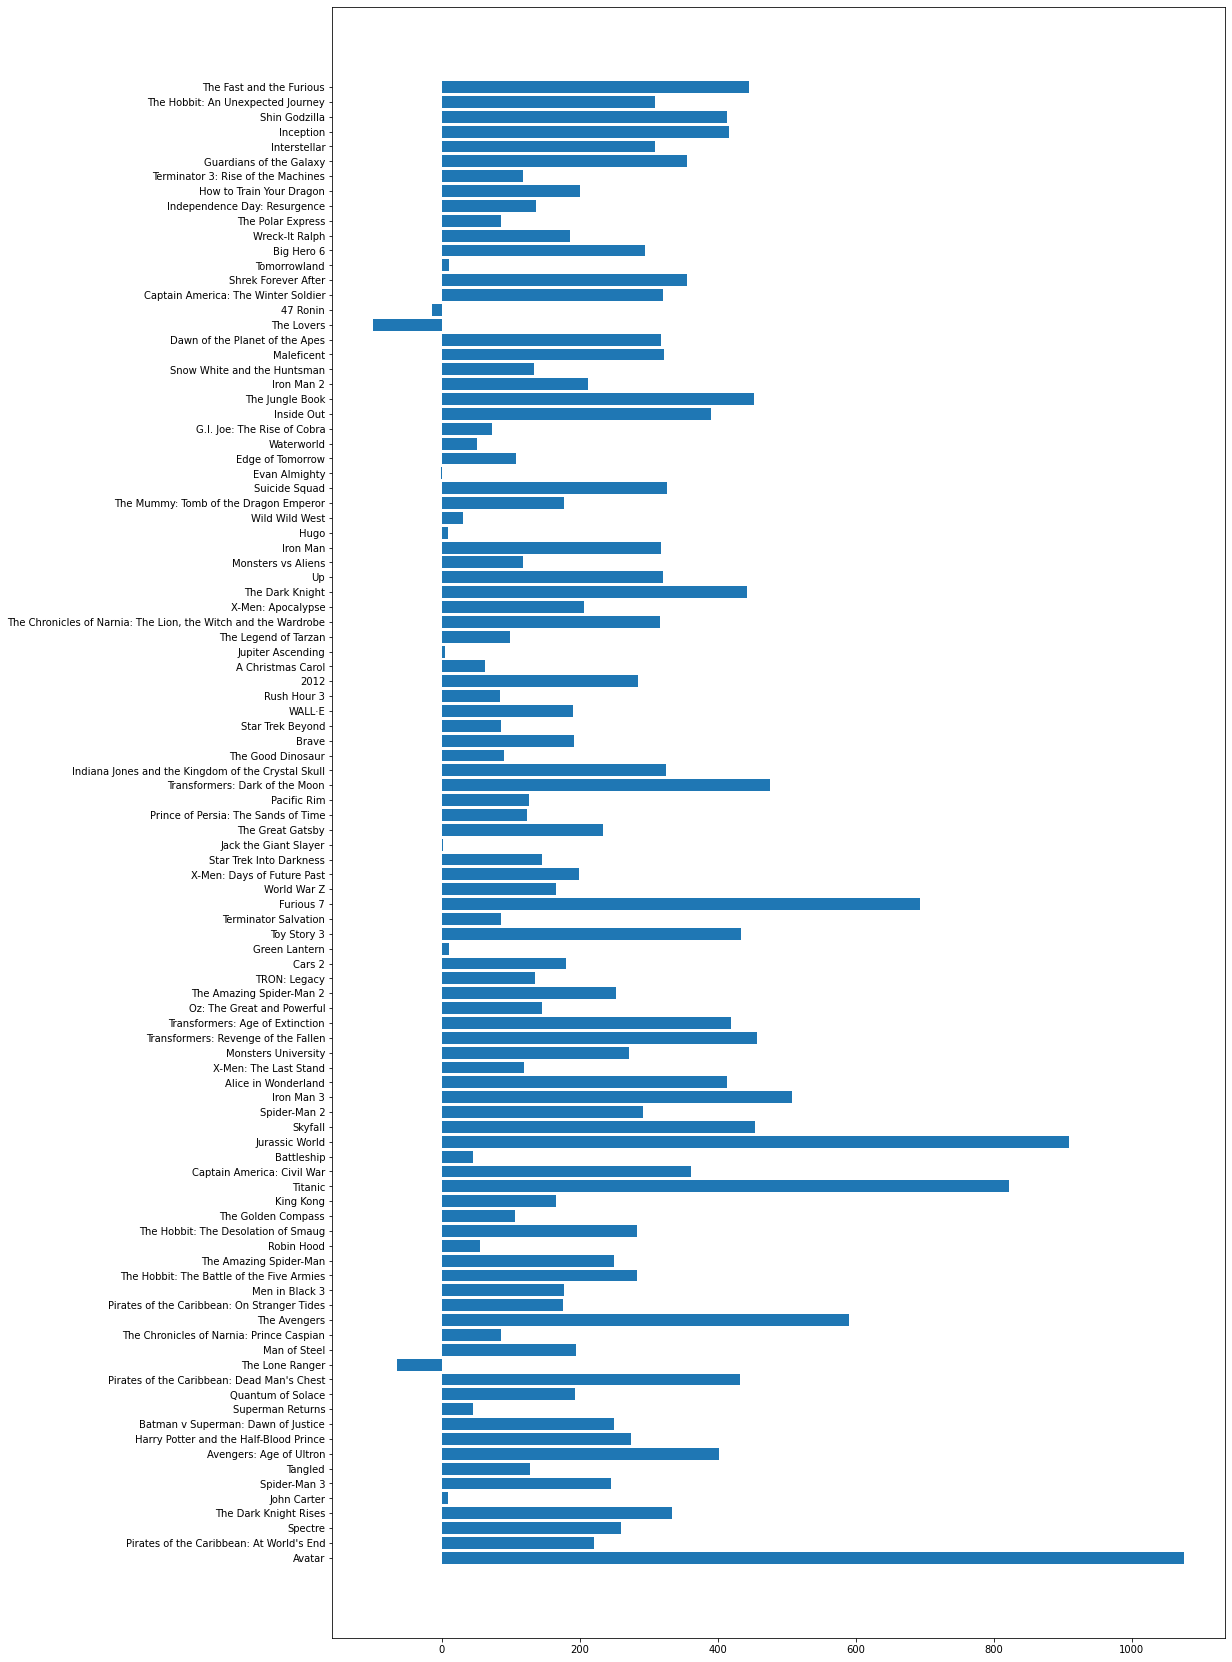

In [31]:
x=original_title[0:100]
y=profit_percent[0:100]
x=x.tolist()
y=y.tolist()
fig, ax = plt.subplots(figsize =(16, 30))
ax.barh(x, y)

# Recommendation System

In [32]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
print(combined_features)

0        Action Adventure Fantasy Science Fiction  cul...
1        Adventure Fantasy Action  ocean drug abuse ex...
2        Action Adventure Crime  spy based on novel se...
3        Action Crime Drama Thriller  dc comics crime ...
4        Action Adventure Science Fiction  based on no...
                              ...                        
4798     Action Crime Thriller  united states–mexico b...
4799     Comedy Romance  A newlywed couple's honeymoon...
4800     Comedy Drama Romance TV Movie  date love at f...
4801      A New Yorker in Shanghai  Daniel Henney Eliz...
4802     Documentary  obsession camcorder crush dream ...
Length: 4799, dtype: object


In [34]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 32153)	0.06329037739124997
  (0, 19542)	0.08214154297776316
  (0, 42558)	0.09388471383968466
  (0, 27969)	0.09388471383968466
  (0, 41457)	0.09388471383968466
  (0, 32412)	0.031087022528595826
  (0, 2765)	0.05528727008820283
  (0, 40282)	0.08647559794162502
  (0, 964)	0.057007470029388295
  (0, 37003)	0.06329037739124997
  (0, 35064)	0.07566249993384848
  (0, 32358)	0.08955065887582281
  (0, 33169)	0.07566249993384848
  (0, 14359)	0.07308469585517165
  (0, 31547)	0.09388471383968466
  (0, 30576)	0.08214154297776316
  (0, 37156)	0.0512460853558605
  (0, 30342)	0.09388471383968466
  (0, 23063)	0.05667340863027244
  (0, 29258)	0.09388471383968466
  (0, 19730)	0.06825338403578882
  (0, 28208)	0.07906648204356535
  (0, 38364)	0.04717927168048331
  (0, 17869)	0.051649495298074805
  (0, 26046)	0.07234722451384148
  :	:
  (4797, 27793)	0.15386551087047926
  (4797, 4071)	0.1405601560025473
  (4797, 33169)	0.29470861467311305
  (4798, 17076)	0.34247850797478185
  (4798, 6144)	0.27972274836

In [35]:
similarity = cosine_similarity(feature_vectors)

In [36]:
list_of_all_titles = data_movies['title_x'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [37]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : iron man


In [38]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [39]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [40]:
index_of_the_movie = data_movies[data_movies.title_x == close_match]['id'].values[0]
print(index_of_the_movie)

1726


In [41]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.02126893318855789), (1, 0.022418184729236734), (2, 0.005701350221501826), (3, 0.046557059947431007), (4, 0.01274915232164454), (5, 0.03700006957292518), (6, 0.0118891996733804), (7, 0.008967814807347605), (8, 0.015296230754131203), (9, 0.027130607492720754), (10, 0.008211521286553544), (11, 0.013765726321108934), (12, 0.020439529509221902), (13, 0.004301432205716605), (14, 0.02231899512189722), (15, 0.02691015977182506), (16, 0.015403819410440379), (17, 0.007886274171228305), (18, 0.022494458206633806), (19, 0.02455504824775665), (20, 0.010796676825156427), (21, 0.019912820833726114), (22, 0.015655401784103493), (23, 0.018077978943342135), (24, 0.019471760352205755), (25, 0.052892846543712776), (26, 0.03296161929148295), (27, 0.0269755868942439), (28, 0.018840714681196725), (29, 0.006433996646959731), (30, 0.035638475463322467), (31, 0.04055274500698466), (32, 0.015873264471935336), (33, 0.019056554718571612), (34, 0.016480344546796123), (35, 0.02253924754151384), (36, 0.0173934

In [42]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(1726, 1.0), (4008, 0.260186843524503), (3001, 0.18669026451263349), (1441, 0.17561105403275873), (2254, 0.1508300395869215), (556, 0.12357581545517587), (1734, 0.11971140135487546), (1383, 0.11619944640139292), (2910, 0.09173249150310585), (1248, 0.09099723241035272), (274, 0.08747392803173014), (441, 0.08706727394499411), (3578, 0.08398587802717054), (3283, 0.0838665799302961), (3852, 0.07970462303337203), (1372, 0.0790609236432554), (4521, 0.07856460168835934), (3977, 0.07724821246152955), (1502, 0.07699686833758526), (1426, 0.07673671460172717), (356, 0.07647782274670775), (3990, 0.07582105200819723), (4686, 0.07566452193834762), (4069, 0.0745498518276326), (2354, 0.07336965431206528), (442, 0.07289689588569637), (2010, 0.07274514551302495), (939, 0.07272108844279195), (2357, 0.06964043700864324), (3711, 0.06955079156313806), (1175, 0.06732972160824832), (266, 0.06679181411517976), (3952, 0.06647379223089123), (964, 0.06622609557874262), (3590, 0.06575776532659038), (2232, 0.06553

In [45]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data_movies[data_movies.id==index]['title_x']
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . 68    Iron Man
Name: title_x, dtype: object
2 . Series([], Name: title_x, dtype: object)
3 . Series([], Name: title_x, dtype: object)
4 . Series([], Name: title_x, dtype: object)
5 . Series([], Name: title_x, dtype: object)
6 . Series([], Name: title_x, dtype: object)
7 . 315    The Mummy Returns
Name: title_x, dtype: object
8 . Series([], Name: title_x, dtype: object)
9 . Series([], Name: title_x, dtype: object)
10 . 970    Hannibal Rising
Name: title_x, dtype: object
11 . 2091    The Silence of the Lambs
Name: title_x, dtype: object
12 . Series([], Name: title_x, dtype: object)
13 . Series([], Name: title_x, dtype: object)
14 . Series([], Name: title_x, dtype: object)
15 . Series([], Name: title_x, dtype: object)
16 . 297    Blood Diamond
Name: title_x, dtype: object
17 . Series([], Name: title_x, dtype: object)
18 . Series([], Name: title_x, dtype: object)
19 . Series([], Name: title_x, dtype: object)
20 . Series([], Name: title_x, dtype: object)
21 

In [45]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = data_movies['original_title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = data_movies[data_movies.original_title == close_match]['id'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data_movies[data_movies.id==index]['original_title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Iron Man
Movies suggested for you : 

1 . Iron Man


IndexError: ignored